In [331]:
import igraph
from igraph import *
import pynations
from pynations.CountryInfo import CountryInfo
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Building of the full graph of Europe. The package "pynations" contains information about neighbors of countries

In [332]:
file = open("countries.txt")
name = file.read().splitlines()
g_ = Graph()
g_.add_vertices(49)
g_.vs["name"] = name
for i in name:
    data = CountryInfo(i)
    nb = data.neighbors()
    v = g_.vs.find(name=i)
    for j in nb:
        check_europe = g_.vs.select(name=j)
        if(len(check_europe) == 1 and not((i == 'Albania' and j == 'Serbia') or (i == 'Serbia' and j == 'Albania'))):
            u = g_.vs.find(name=j)
            if(len(check_europe) == 1 and not(g_.are_connected(v, u))):
                g_.add_edge(v, u)

Drawing of the full graph g_ of Europe

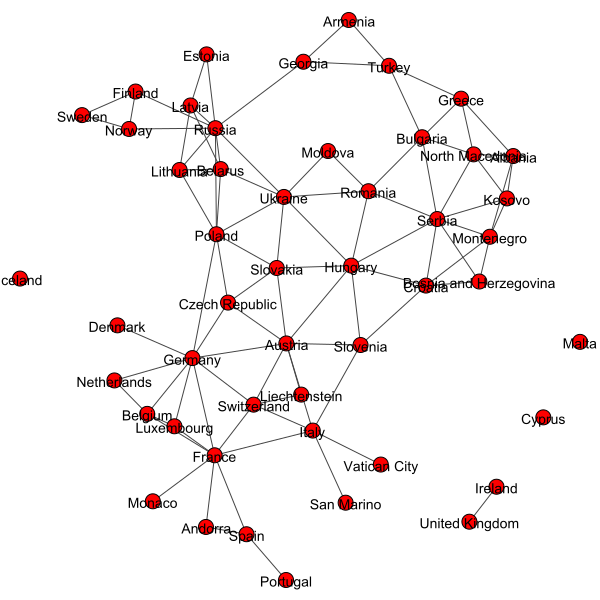

In [333]:
layout = g_.layout_fruchterman_reingold()
plot(g_, vertex_label=name, vertex_size = 15, layout = layout)

Building of the graph with networkx

In [334]:
g_nx = nx.Graph()
for i in name:
    g_nx.add_node(i)
for i in name:
    data = CountryInfo(i)
    nb = data.neighbors()
    for j in nb:
        if(j in name and not((i == 'Albania' and j == 'Serbia') or (i == 'Serbia' and j == 'Albania'))):
            g_nx.add_edge(i, j)

(a) Drawing the planar graph g_ of Europe with networkx

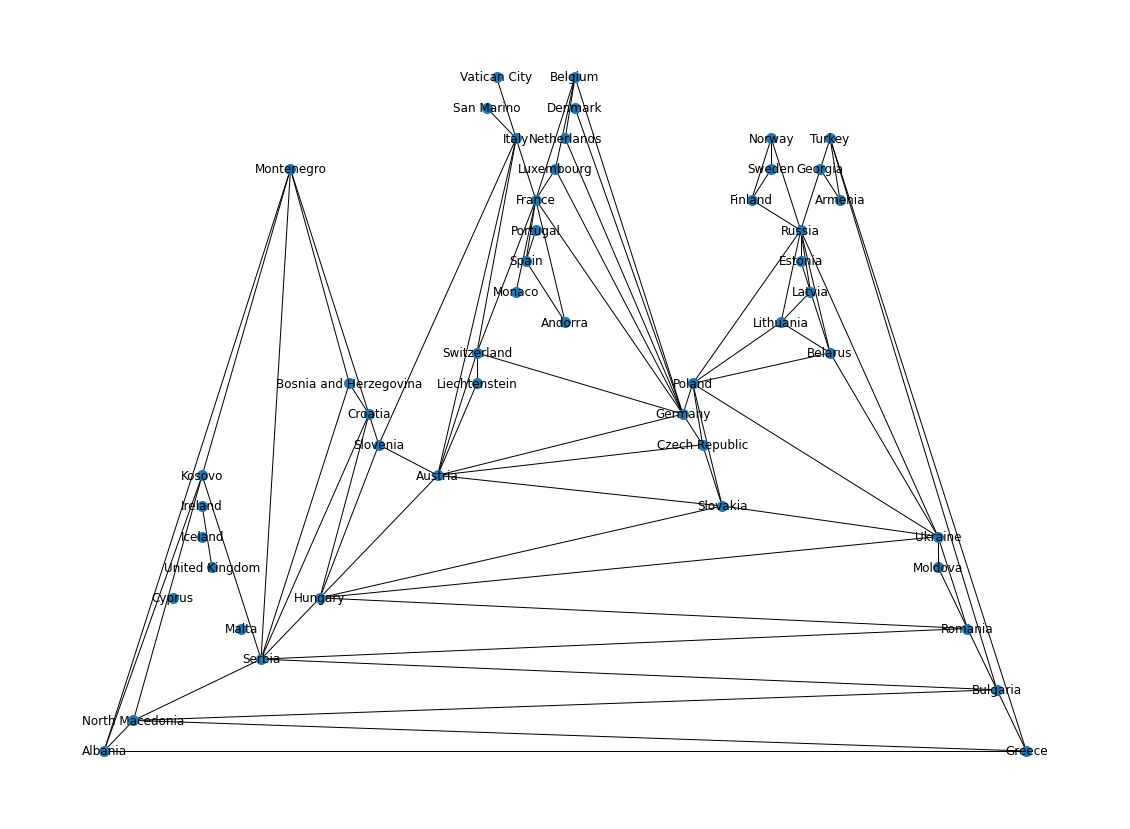

In [335]:
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_planar(g_nx, node_size=100, with_labels=True)

Getting largest connected component G with networkx and igraph

In [336]:
components = sorted(nx.connected_components(g_nx), key=len, reverse=True)
G_nx = g_nx.subgraph(components[0])
G_ig = igraph.Graph().from_networkx(G_nx)

(b) Using G_nx and G_ig and their methods from networkx and igraph

In [337]:
print('|V| - ', G_nx.number_of_nodes())
print('|E| - ', G_nx.number_of_edges())
mn = 1000
mx = -1
for country, degree in G_nx.degree:
    mn = min(mn, degree)
    mx = max(mx, degree)
print('𝛿(g) - ', mn)
print('Δ(g) - ', mx)
print('rad(G) - ', G_ig.radius()) 
print('diam(G) - ', G_ig.diameter()) 
print('girth(G) - ', G_ig.girth())
from networkx import center
print('center(G) - ', center(G_nx))
print('κ(G) - ', 1, 'Delete: ', nx.minimum_node_cut(G_nx))
print('λ(G) - ', 1, 'Delete: ', nx.minimum_edge_cut(G_nx))

|V| -  44
|E| -  91
𝛿(g) -  1
Δ(g) -  9
rad(G) -  5.0
diam(G) -  8
girth(G) -  3
center(G) -  ['Austria', 'Belarus', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Lithuania', 'Poland', 'Russia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']
κ(G) -  1 Delete:  {'Germany'}
λ(G) -  1 Delete:  {('Italy', 'San Marino')}


(c) Using greedy_color from networkx to find vertex coloring, creating color_map to visualize the result

{'Germany': 0, 'Russia': 0, 'Austria': 1, 'France': 1, 'Serbia': 0, 'Hungary': 2, 'Poland': 1, 'Ukraine': 3, 'Italy': 0, 'Belarus': 2, 'Bulgaria': 1, 'Croatia': 1, 'Montenegro': 2, 'North Macedonia': 2, 'Romania': 4, 'Slovakia': 0, 'Switzerland': 2, 'Albania': 0, 'Belgium': 2, 'Czech Republic': 2, 'Greece': 3, 'Kosovo': 1, 'Latvia': 1, 'Lithuania': 3, 'Slovenia': 3, 'Turkey': 0, 'Bosnia and Herzegovina': 3, 'Finland': 1, 'Georgia': 1, 'Luxembourg': 3, 'Norway': 2, 'Spain': 0, 'Armenia': 2, 'Andorra': 2, 'Estonia': 2, 'Liechtenstein': 0, 'Moldova': 0, 'Netherlands': 1, 'Sweden': 0, 'Denmark': 1, 'Monaco': 0, 'Portugal': 1, 'San Marino': 1, 'Vatican City': 1}
[2, 0, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 1, 1, 0, 1, 3, 2, 0, 1, 1, 0, 3, 3, 0, 0, 2, 1, 2, 2, 1, 1, 4, 0, 1, 0, 0, 3, 0, 0, 2, 0, 3, 1]


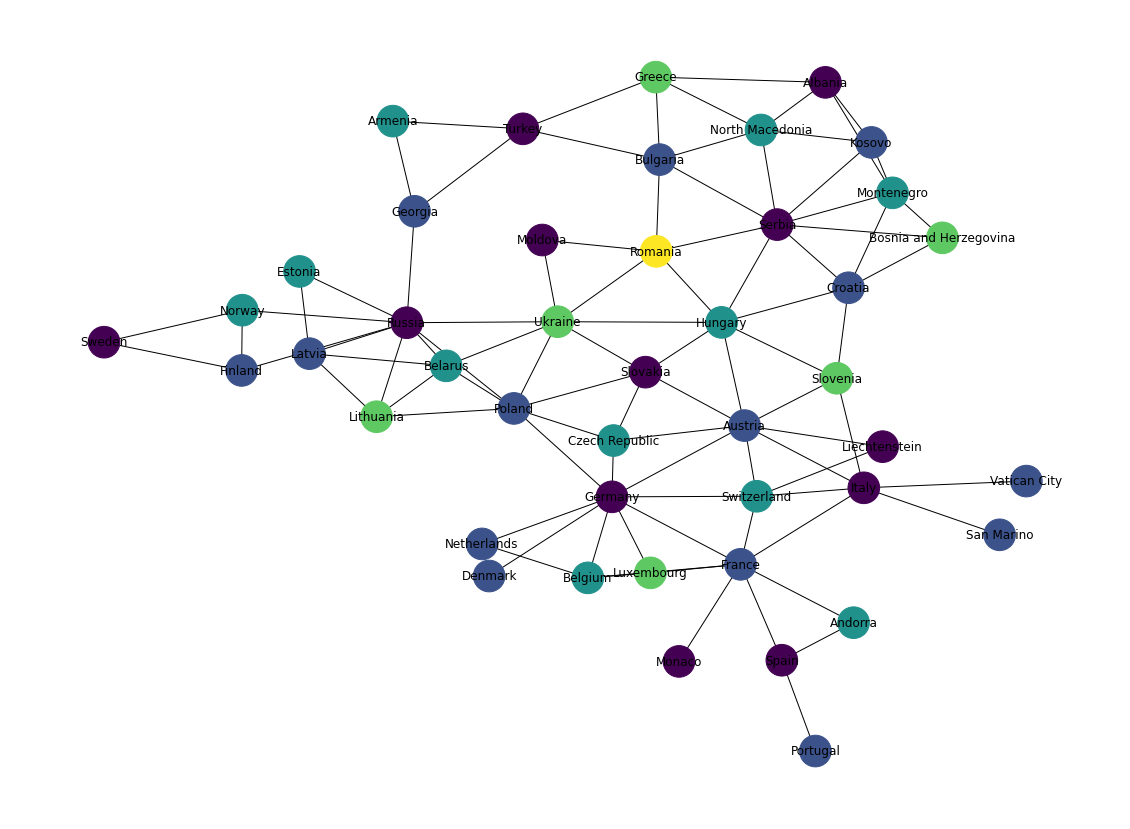

In [338]:
min_coloring = nx.greedy_color(G_nx)
print(min_coloring)
color_map = []
for node in G_nx:
    color_map.append(min_coloring[node])
print(color_map)
fig, ax = plt.subplots(figsize=(20, 15))
pos_color = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_color, node_color=color_map, node_size=1000, with_labels=True)

(d) Creating a graph which has a node for each edge in G_nx and an edge joining those nodes if the two edges in G_nx share a common node to find minimum edge cover using greedy_color

{('France', 'Germany'): 0, ('Austria', 'Germany'): 1, ('Germany', 'Poland'): 2, ('Poland', 'Russia'): 0, ('Russia', 'Ukraine'): 1, ('Hungary', 'Serbia'): 0, ('Austria', 'Hungary'): 2, ('Poland', 'Ukraine'): 3, ('Austria', 'Italy'): 0, ('Belarus', 'Russia'): 2, ('France', 'Italy'): 1, ('Hungary', 'Ukraine'): 4, ('Germany', 'Switzerland'): 3, ('Austria', 'Switzerland'): 4, ('Latvia', 'Russia'): 3, ('Lithuania', 'Russia'): 4, ('France', 'Switzerland'): 2, ('Belgium', 'Germany'): 4, ('Croatia', 'Serbia'): 1, ('Romania', 'Serbia'): 2, ('Austria', 'Slovakia'): 3, ('Bulgaria', 'Serbia'): 3, ('North Macedonia', 'Serbia'): 4, ('Montenegro', 'Serbia'): 5, ('Czech Republic', 'Germany'): 5, ('Belgium', 'France'): 3, ('Kosovo', 'Serbia'): 6, ('Germany', 'Luxembourg'): 6, ('Romania', 'Ukraine'): 0, ('Norway', 'Russia'): 5, ('Hungary', 'Romania'): 1, ('Poland', 'Slovakia'): 1, ('Slovakia', 'Ukraine'): 2, ('Austria', 'Slovenia'): 5, ('Croatia', 'Hungary'): 3, ('Belarus', 'Ukraine'): 5, ('Finland', 'Ru

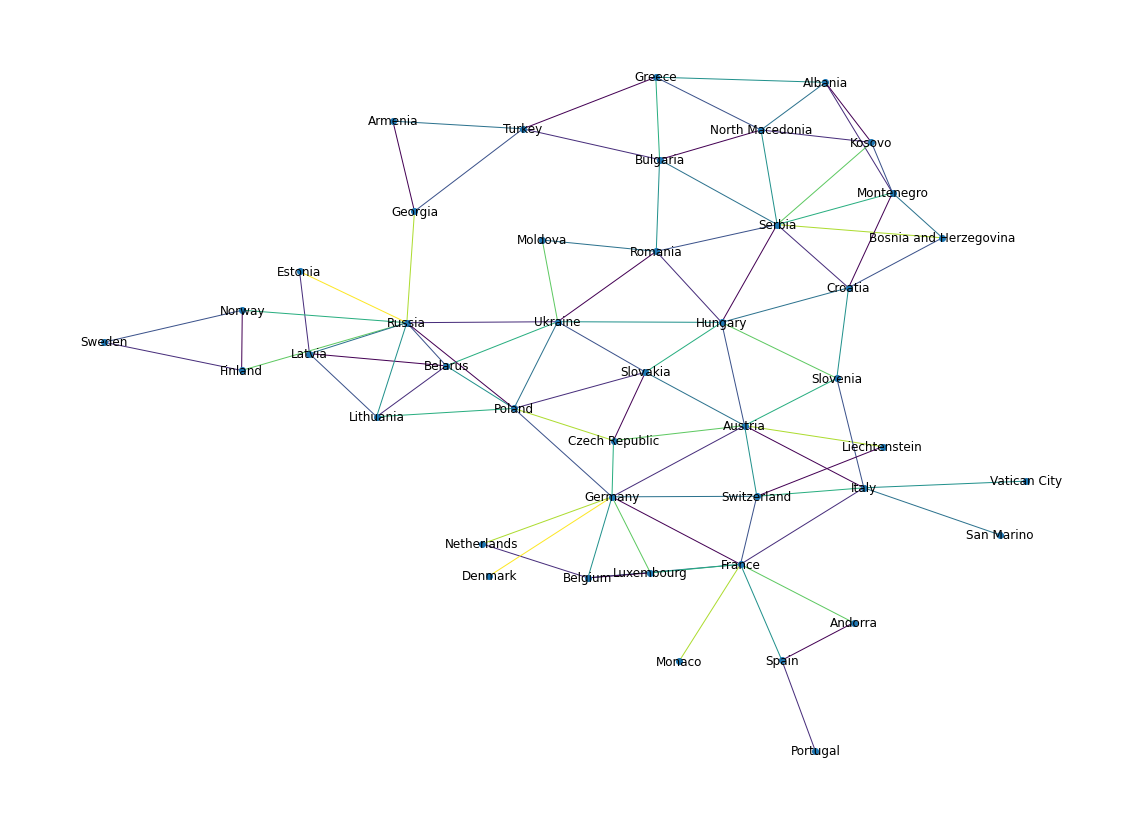

In [339]:
G_line = nx.line_graph(G_nx)
min_edge_coloring = nx.greedy_color(G_line)
print(min_edge_coloring)
map_color = []
for edge in G_nx.edges:
    map_color.append(min_edge_coloring[edge])
fig, ax = plt.subplots(figsize=(20, 15))
pos_color = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_color, edge_color=map_color, node_size=None, with_labels=True)

(e) Using clique form networkx to find all cliques, searching for the maximum

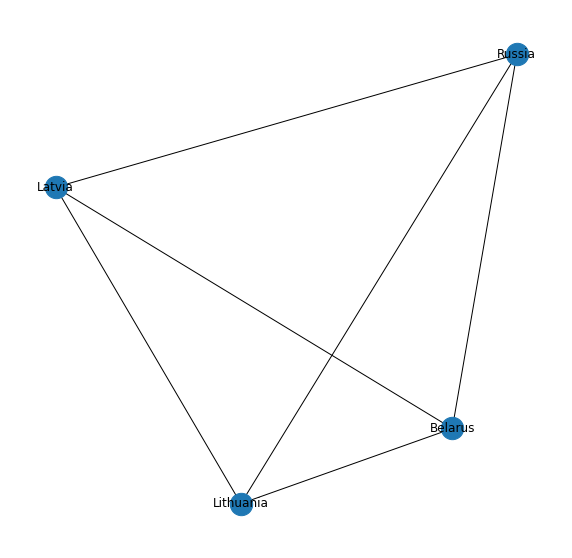

In [340]:
from networkx import clique
cliques = clique.find_cliques_recursive(G_nx)
clique_mx = []
for clique in cliques:
    if (len(clique) > len(clique_mx)):
        clique_mx = clique
clique_graph = G_nx.subgraph(clique_mx)
fig, ax = plt.subplots(figsize=(10, 10))
pos_clique = nx.spring_layout(G_nx)
nx.draw(clique_graph, pos_clique, node_size=500, with_labels=True)

(f) Finding the maximum stable set, using loop to find maximum from result of maximal_imdependent_set

['Andorra', 'Denmark', 'Kosovo', 'Lithuania', 'Slovenia', 'Luxembourg', 'Moldova', 'Monaco', 'Armenia', 'Estonia', 'Norway', 'Slovakia', 'San Marino', 'Bosnia and Herzegovina', 'Netherlands', 'Greece', 'Liechtenstein', 'Vatican City', 'Portugal']
Number of vertices in the set - 19


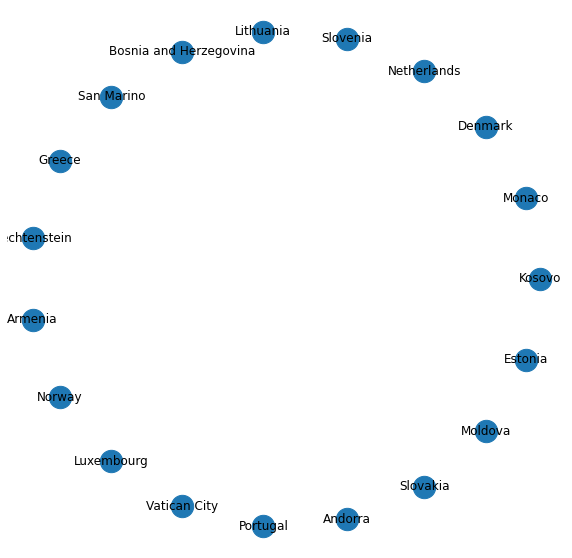

In [341]:
mx_set = []
for i in range(0, 1000):
    set = nx.maximal_independent_set(G_nx)
    if(len(set) > len(mx_set)):
        mx_set = set
print(mx_set)
print('Number of vertices in the set -',len(mx_set))
independent_set_graph = G_nx.subgraph(mx_set)
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_circular(independent_set_graph, node_size=500, with_labels=True)

(g) Finding the maximum matching. Yellow edges are part of the matching

{('Moldova', 'Ukraine'), ('Armenia', 'Georgia'), ('Kosovo', 'Montenegro'), ('Bulgaria', 'North Macedonia'), ('Hungary', 'Romania'), ('Finland', 'Norway'), ('Belgium', 'Germany'), ('Estonia', 'Latvia'), ('Czech Republic', 'Poland'), ('France', 'Italy'), ('Bosnia and Herzegovina', 'Croatia'), ('Austria', 'Switzerland'), ('Albania', 'Greece'), ('Andorra', 'Spain'), ('Belarus', 'Lithuania')}
Number of edges - 15


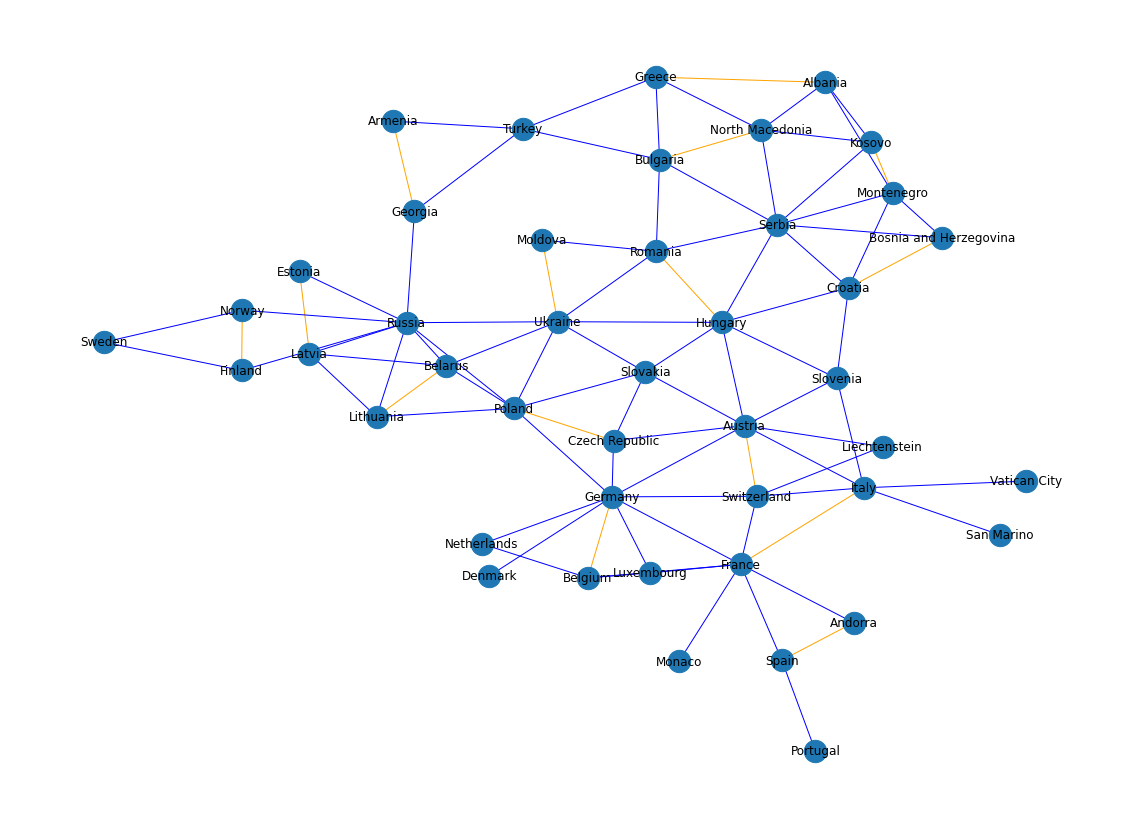

In [342]:
match_max = []
for i in range(0, 1000):
    match = nx.maximal_matching(G_nx)
    if(len(match)>15):
        print("yeah")
    if(len(match) > len(match_max)):
        match_max = match
print(match_max)
print('Number of edges -', len(match_max))
map_color = []
for country1, country2 in G_nx.edges:
    k1 = (country1, country2)
    k2 = (country2, country1)
    if(k1 in match_max or k2 in match_max):
        map_color.append('orange')
    else:
        map_color.append('blue')
fig, ax = plt.subplots(figsize=(20, 15))
pos_match = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_match, edge_color=map_color, node_size=500, with_labels=True)

(h) Finding the minimum vertex cover usign vertex_cover from netwrokx, red nodes are part of the cover

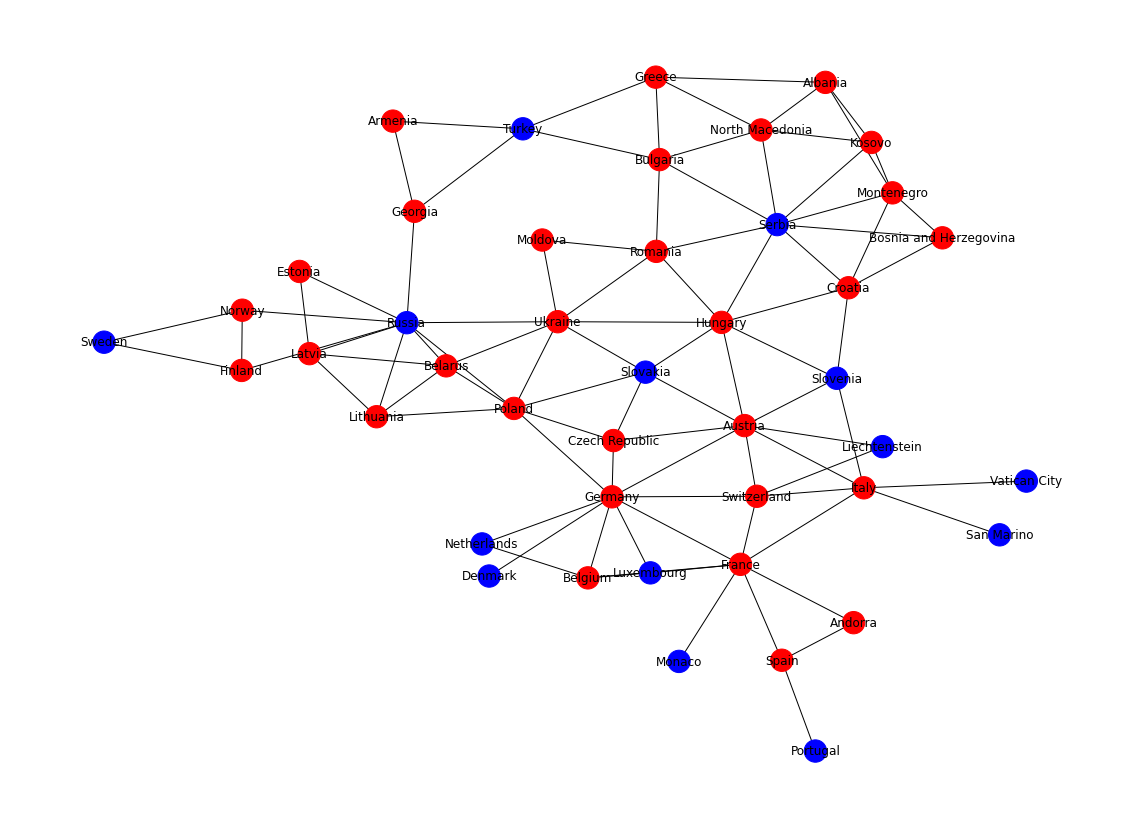

In [343]:
from networkx.algorithms.approximation import vertex_cover
min_vertex_cover = vertex_cover.min_weighted_vertex_cover(G_nx)
map_color = []
for node in G_nx.nodes:
    if (node in min_vertex_cover):
        map_color.append('red')
    else:
        map_color.append('blue')
fig, ax = plt.subplots(figsize=(20, 15))
pos_edge_cover = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_edge_cover, node_color=map_color, node_size=500, with_labels=True)

(i) 

These nodes are not a part of the cover:
Denmark
Liechtenstein
Luxembourg
Monaco
Netherlands
Portugal
Russia
San Marino
Serbia
Slovakia
Slovenia
Sweden
Turkey
Vatican City
They should be added!
Edges that could be added:
Denmark :
Liechtenstein :
Luxembourg :
Monaco :
Netherlands :
Portugal :
Russia :
San Marino :
Serbia :
Slovakia :
Slovenia :
Sweden :
Turkey :
Vatican City :
Is it the edge cover? True Number of edges: 29
There is no better way to add nodes. So, it is the minimum edge cover
{('Italy', 'San Marino'), ('Bosnia and Herzegovina', 'Serbia'), ('Austria', 'Slovakia'), ('Belgium', 'Luxembourg'), ('France', 'Monaco'), ('Belgium', 'Netherlands'), ('Portugal', 'Spain'), ('Denmark', 'Germany'), ('Finland', 'Norway'), ('Belgium', 'Germany'), ('Czech Republic', 'Poland'), ('France', 'Italy'), ('Andorra', 'Spain'), ('Finland', 'Sweden'), ('Armenia', 'Turkey'), ('Armenia', 'Georgia'), ('Kosovo', 'Montenegro'), ('Belarus', 'Russia'), ('Hungary', 'Romania'), ('Austria', 'Liechtenstein'

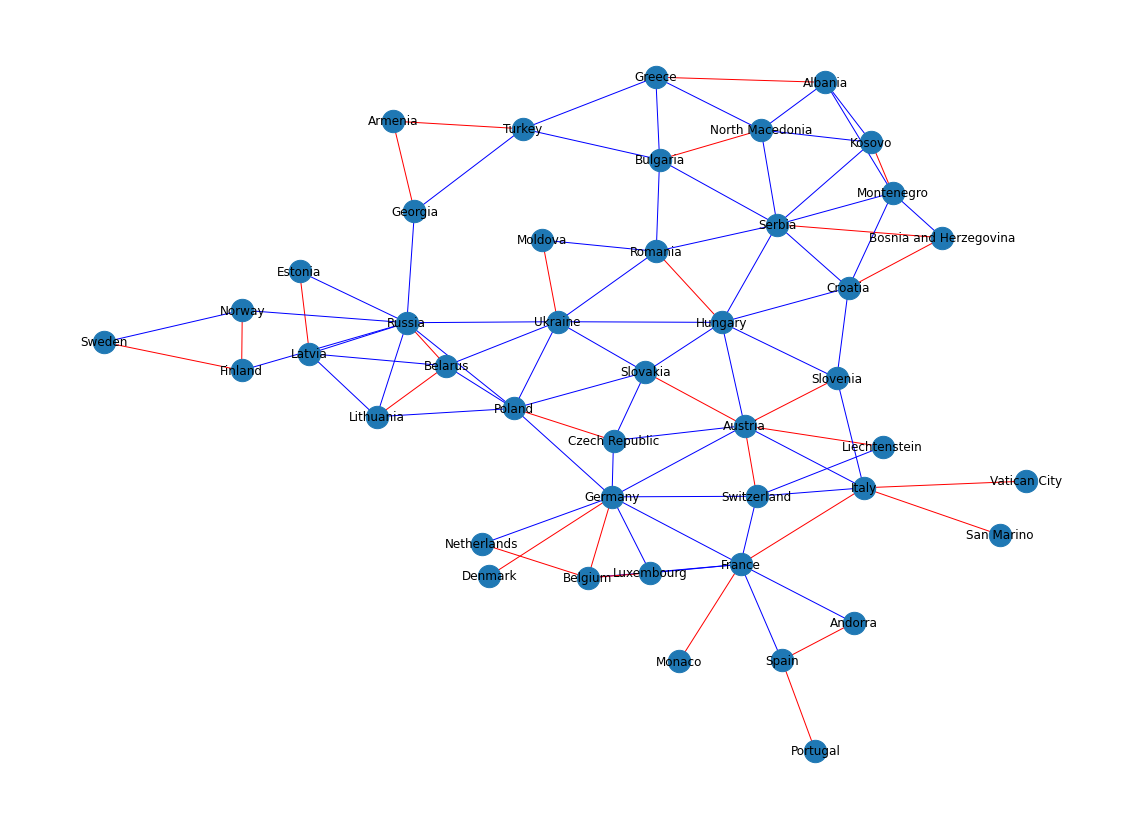

In [344]:
min_edge_cover = match_max
print('These nodes are not a part of the cover:')
map_color = []
for edge in G_nx.edges:
    if (edge in min_edge_cover):
        map_color.append('red')
    else:
        map_color.append('blue')
nodes_to_add = []
for node in G_nx.nodes:
    check = False
    for v, u in min_edge_cover:
        if (node == v or node == u):
            check = True
    if (not check):
        nodes_to_add.append(node)
        print(node)
print('They should be added!')
print('Edges that could be added:')
for node in nodes_to_add:
    print(node, ':')
    for edge in G_nx.edges:
        if (not(edge in min_edge_cover) and node in edge):
            min_edge_cover.update([edge])
            break
print('Is it the edge cover?', nx.is_edge_cover(G_nx, min_edge_cover), 'Number of edges:', len(min_edge_cover))
print('There is no better way to add nodes. So, it is the minimum edge cover')
print(min_edge_cover)
map_color = []
for edge in G_nx.edges:
    if (edge in min_edge_cover):
        map_color.append('red')
    else:
        map_color.append('blue')
fig, ax = plt.subplots(figsize=(20, 15))
pos_edge_cover = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_edge_cover, edge_color=map_color, node_size=500, with_labels=True)

(j) Finding closed path using networkx

In [345]:
closed_path = nx.approximation.traveling_salesman_problem(G_nx)
print(len(closed_path))
print(closed_path)

60
['Armenia', 'Turkey', 'Bulgaria', 'Romania', 'Moldova', 'Ukraine', 'Belarus', 'Lithuania', 'Russia', 'Finland', 'Sweden', 'Norway', 'Russia', 'Estonia', 'Latvia', 'Belarus', 'Poland', 'Czech Republic', 'Austria', 'Slovenia', 'Austria', 'Slovakia', 'Austria', 'Switzerland', 'Liechtenstein', 'Austria', 'Italy', 'Vatican City', 'Italy', 'San Marino', 'Italy', 'France', 'Spain', 'Portugal', 'Spain', 'Andorra', 'France', 'Monaco', 'France', 'Belgium', 'Netherlands', 'Germany', 'Denmark', 'Germany', 'Luxembourg', 'Germany', 'Austria', 'Hungary', 'Croatia', 'Bosnia and Herzegovina', 'Serbia', 'Montenegro', 'Albania', 'North Macedonia', 'Kosovo', 'Albania', 'Greece', 'Turkey', 'Georgia', 'Armenia']


(k) Finding closed path in the line graph using networkx

In [346]:
G_line = nx.line_graph(G_nx)
closed_path = nx.approximation.traveling_salesman_problem(G_line)
print(len(closed_path))
print(closed_path)

104
[('Denmark', 'Germany'), ('Belgium', 'Germany'), ('Belgium', 'Luxembourg'), ('Belgium', 'France'), ('France', 'Switzerland'), ('France', 'Monaco'), ('France', 'Luxembourg'), ('France', 'Spain'), ('Portugal', 'Spain'), ('Andorra', 'Spain'), ('Andorra', 'France'), ('France', 'Italy'), ('Italy', 'San Marino'), ('Austria', 'Italy'), ('Italy', 'Switzerland'), ('Italy', 'Vatican City'), ('Italy', 'Slovenia'), ('Croatia', 'Slovenia'), ('Hungary', 'Slovenia'), ('Hungary', 'Romania'), ('Hungary', 'Slovakia'), ('Croatia', 'Hungary'), ('Hungary', 'Romania'), ('Romania', 'Ukraine'), ('Moldova', 'Romania'), ('Bulgaria', 'Romania'), ('Bulgaria', 'North Macedonia'), ('Bulgaria', 'Greece'), ('Bulgaria', 'Turkey'), ('Armenia', 'Turkey'), ('Greece', 'Turkey'), ('Greece', 'North Macedonia'), ('Albania', 'Greece'), ('Albania', 'North Macedonia'), ('Kosovo', 'North Macedonia'), ('Albania', 'Kosovo'), ('Albania', 'North Macedonia'), ('North Macedonia', 'Serbia'), ('Kosovo', 'Serbia'), ('Kosovo', 'Monten

(l)

{'Spain', 'Portugal'}
{'Spain', 'Andorra', 'France'}
{'Germany', 'Denmark'}
{'Italy', 'San Marino'}
{'Vatican City', 'Italy'}
{'Monaco', 'France'}
{'Norway', 'Sweden', 'Finland', 'Russia'}
{'Kosovo', 'Turkey', 'Poland', 'Georgia', 'France', 'Romania', 'Czech Republic', 'Netherlands', 'Slovenia', 'Lithuania', 'Bosnia and Herzegovina', 'Germany', 'Bulgaria', 'Switzerland', 'Montenegro', 'Ukraine', 'Albania', 'Hungary', 'Belarus', 'Greece', 'Russia', 'Liechtenstein', 'North Macedonia', 'Latvia', 'Serbia', 'Armenia', 'Luxembourg', 'Belgium', 'Italy', 'Slovakia', 'Austria', 'Croatia', 'Moldova', 'Estonia'}
{'United Kingdom', 'Ireland'}


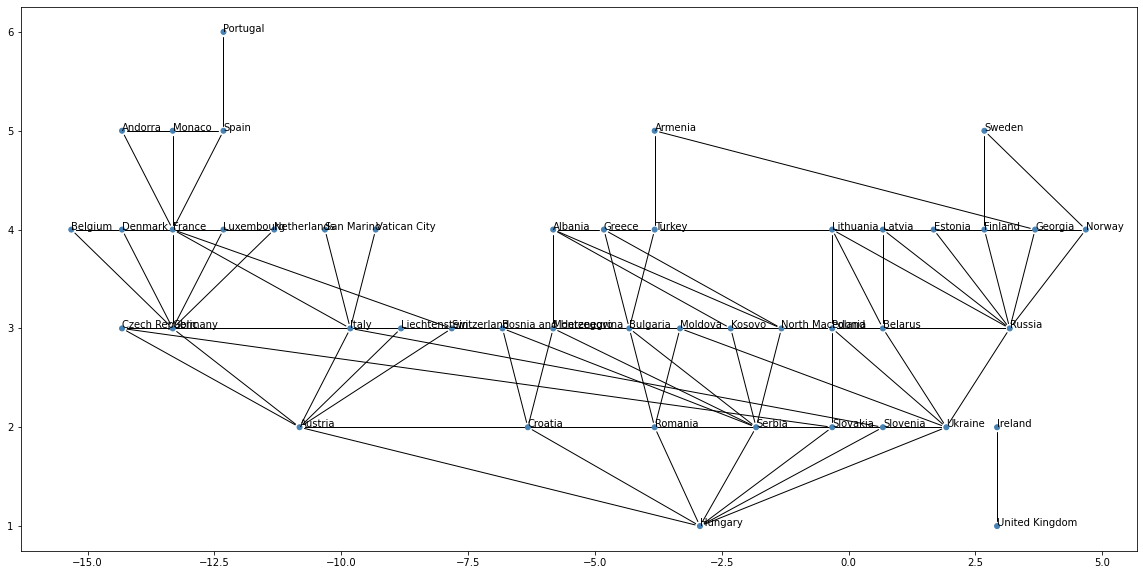

In [347]:
bicomp = list(nx.biconnected_components(g_nx))
g_comp_cut = nx.Graph(g_nx)
for q in bicomp:
    print(q)
for node in g_nx.nodes:
    check = False
    for i in range(len(bicomp)):
        if (node in bicomp[i]):
            check=True
            break
    if (not check):
        g_comp_cut.remove_node(node)

map_size = []
for node in g_comp_cut.nodes:
    map_size.append(1)
g_comp_cut_ig = igraph.Graph.from_networkx(g_comp_cut)   
layout_comp = g_comp_cut_ig.layout_reingold_tilford()
fig, ax = plt.subplots(figsize=(20, 10))
plot(g_comp_cut_ig, target=ax, layout=layout_comp, vertex_size = 5, vertex_label=g_comp_cut.nodes, edge_size = 10000)

(m)

{'Kosovo', 'Turkey', 'Poland', 'Georgia', 'France', 'Romania', 'Czech Republic', 'Netherlands', 'Sweden', 'Finland', 'Slovenia', 'Lithuania', 'Bosnia and Herzegovina', 'Bulgaria', 'Germany', 'Spain', 'Switzerland', 'Montenegro', 'Ukraine', 'Albania', 'Hungary', 'Belarus', 'Greece', 'Russia', 'Liechtenstein', 'North Macedonia', 'Latvia', 'Serbia', 'Armenia', 'Norway', 'Luxembourg', 'Belgium', 'Italy', 'Slovakia', 'Andorra', 'Moldova', 'Croatia', 'Austria', 'Estonia'}
{'Cyprus'}
{'Denmark'}
{'Iceland'}
{'Ireland'}
{'Malta'}
{'Monaco'}
{'Portugal'}
{'San Marino'}
{'United Kingdom'}
{'Vatican City'}


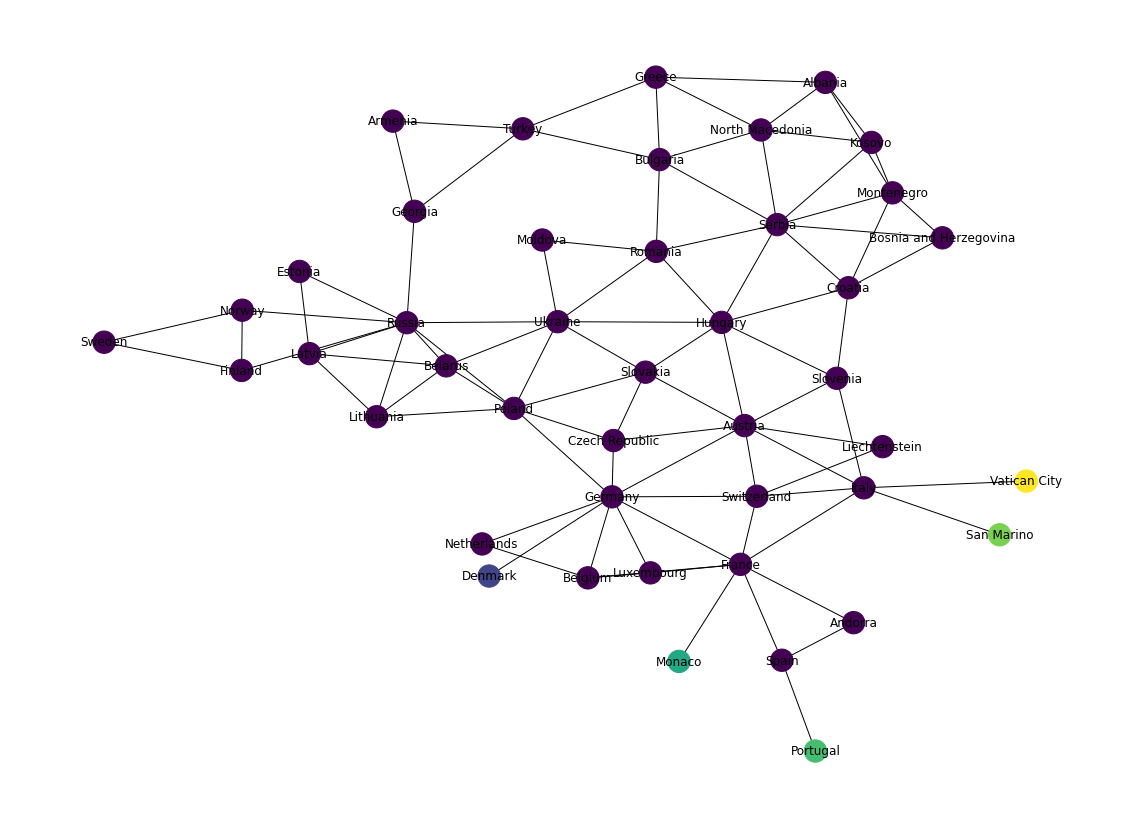

In [348]:
edge_connected = list(nx.k_edge_components(g_nx, 2))
for components in edge_connected:
    print(components)
map_color = []
for node in G_nx.nodes:
    for i in range(len(edge_connected)):
        if (node in edge_connected[i]):
            map_color.append(i)
fig, ax = plt.subplots(figsize=(20, 15))
pos_edge_connected = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_edge_connected, node_color=map_color, node_size=500, with_labels=True)

    

installing a package to find distance between capitals

In [293]:
!pip install geopy

  Using cached geopy-2.2.0-py3-none-any.whl (118 kB)
  Using cached geographiclib-1.52-py3-none-any.whl (38 kB)


In [349]:
import geopy
from geopy.geocoders import Nominatim
import geopy.distance as gd

(o)

In [350]:
g_w = nx.Graph()
print(g_nx.nodes)
print(g_nx.edges)
g_w.add_nodes_from(list(g_nx.nodes()))
for edge in g_nx.edges:
    data1 = CountryInfo(edge[0])
    data2 = CountryInfo(edge[1])
    cap1 = data1.capital()
    cap2 = data2.capital()
    geolocator1 = Nominatim(user_agent='user')
    geolocator2 = Nominatim(user_agent='user')
    location1 = geolocator1.geocode(cap1)
    location2 = geolocator2.geocode(cap2)
    distance = int(gd.great_circle((location1.latitude, location1.longitude), (location2.latitude, location2.longitude)).km)
    g_w.add_edge(edge[0], edge[1], weight=distance)    

['Armenia', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
[('Armenia', 'Georgia'), ('Armenia', 'Turkey'), ('Albania', 'Greece'), ('Albania', 'Montenegro'), ('Albania', 'North Macedonia'), ('Albania', 'Kosovo'), ('Andorra', 'Spain'), ('Andorra', 'France'), ('Austria', 'Switzerland'), ('Austria', 'Germany'), ('Austria', 'Hungary'), ('Austria', 'Italy'), ('Austria', 'Liechtenstein'), ('Austria', 'Slovenia'), ('Austria', 'Slovakia'), ('Austria', 'Czech Republic'), 

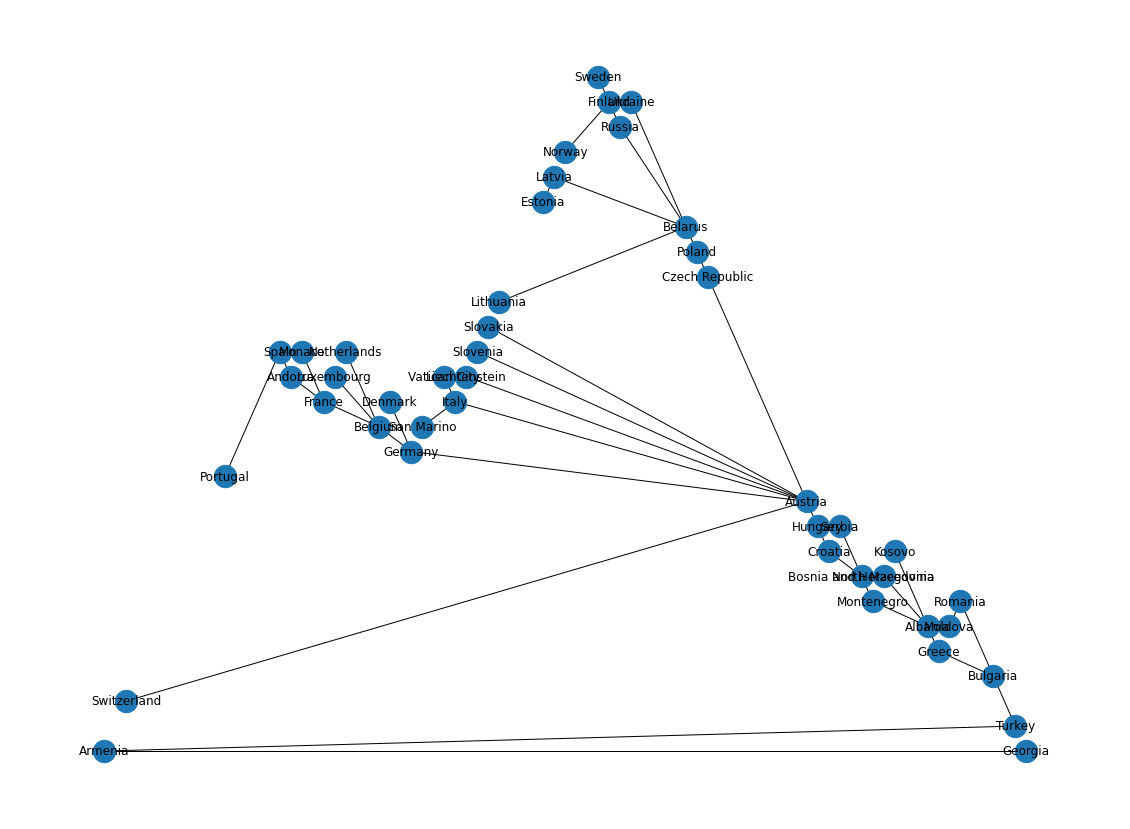

In [360]:
components = sorted(nx.connected_components(g_w), key=len, reverse=True)
G_w = g_nx.subgraph(components[0])
T = nx.minimum_spanning_tree(G_w)
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_planar(T, node_size=500, with_labels=True)   